# Baseline Annotation of Observation based on trained spaCy model 


<fig size= "4">
This notebook provides a baseline annotation suggestion by using refined named entity recognition that we provided using training a deep learning method by prodigy.  </p>
</fig size= "4">  

In [1]:
import spacy 
from spacy import displacy 


In [63]:
from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [104]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [105]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


## Read the Data

In [3]:

importVersion = '013'

In [4]:
path= '../data/01_df_v{0}.pickle'.format(importVersion)# Put the path of the data in your local machine here, consider the letter "r" before the path
dfAstroNova = pd.read_pickle(path)

In [5]:
# Sort the data based on the chapters of the book 
dfAstroNova['chapter'] = dfAstroNova.chapter.replace("appendix b",np.nan).astype(float)  
dfAstroNova = dfAstroNova.rename_axis('MyIdx').sort_values(by = ['chapter', 'MyIdx'], ascending = [True, True])
dfAstroNova.chapter.fillna('appendix b', inplace=True)

In [6]:
dfAstroNova.reset_index(inplace=True)
dfAstroNova=dfAstroNova.drop("MyIdx",axis=1,inplace=False)
dfAstroNova=dfAstroNova.drop("html",axis=1)

In [7]:
type(dfAstroNova)

pandas.core.frame.DataFrame

In [8]:
dfAstroNova.head()

,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
0,Chapter 1,[],[],1,[],[],[],[Chapter 1],"[[(Chapter, None), (1, NUM)]]"
1,On the distinction between the first motion an...,[],[],1,[],[],[],[On the distinction between the first motion a...,"[[(On, None), (the, None), (distinction, None)..."
2,The testimony of the ages confirms that the mo...,[],[],1,[],[],[ Terms: 1. The first motion is that of the wh...,[The testimony of the ages confirms that the m...,"[[(The, None), (testimony, None), (of, None), ..."
3,It is just this from which astronomy arose amo...,[],[],1,[ ch 1 gr 1],[],[],[It is just this from which astronomy arose am...,"[[(It, None), (is, None), (just, None), (this,..."
4,Before the distinction between the first motio...,[],[(such],1,[],[],[ 2],[Before the distinction between the first moti...,"[[(Before, None), (the, None), (distinction, N..."


In [9]:
df=dfAstroNova.reset_index().text.str.split('.',expand=True).stack().reset_index(level=-1,drop=True)
type(df)

pandas.core.series.Series

In [10]:
 # Create lists to fill with values
l_col1 = []
l_col2 = []

# iterrate over each row and fill our lists
for ix, row in dfAstroNova.iterrows():
    for value in row['sentences']:
        l_col1.append(value)
        l_col2.append(row['chapter'])

# Create new dataframe from the two lists
df= pd.DataFrame({'sentences': l_col1 ,
                         'chapter': l_col2 })
df=df.rename(columns={"sentences":"sents"});

In [11]:
len(df)

6699

In [12]:
df.head()

,sents,chapter
0,Chapter 1,1
1,On the distinction between the first motion an...,1
2,The testimony of the ages confirms that the mo...,1
3,"Reason, having borrowed from experience, immed...",1
4,"For among figures it is circles, and among bod...",1


# Upload customized spaCy model provioded by our training data in prodigy

In [13]:
path= '../data/Model_11'
nlp=spacy.load(path)

In [14]:
def entity(x):
    a=[]
    b=[]
    for ent in nlp(x).ents:
        a +=ent.text,
        b +=ent.label_,
    c=list(zip(a,b))
    return c

In [15]:
def noun_chunk(x):
    a=[]
    for chunk in nlp(x).noun_chunks:
        a.append(chunk)
    return a

In [16]:
df['entities'] = df['sents'].apply(lambda x: entity(x))

In [17]:
df['chunks'] = df['sents'].apply(lambda x: noun_chunk(x))

In [18]:
df.head()

,sents,chapter,entities,chunks
0,Chapter 1,1,[],[(Chapter)]
1,On the distinction between the first motion an...,1,[],"[(the, distinction), (the, first, motion), (th..."
2,The testimony of the ages confirms that the mo...,1,[],"[(The, testimony), (the, ages), (the, motions)..."
3,"Reason, having borrowed from experience, immed...",1,[],"[(Reason), (experience), (their, gyrations), (..."
4,"For among figures it is circles, and among bod...",1,[],"[(figures), (it), (circles), (bodies), (the, h..."


In [19]:
df.tail()

,sents,chapter,entities,chunks
6694,"To find the position of Mars at opposition, Ke...",appendix b,"[(Mars, PLAN), (opposition, ASTR), (Mars, PLAN...","[(the, position), (Mars), (opposition), (Keple..."
6695,"Accordingly, Kepler determined the longitude o...",appendix b,"[(longitude, ASTR), (Mars, PLAN), (opposition,...","[(Kepler), (the, longitude), (Mars), (oppositi..."
6696,The Sun moved westward and its longitude decre...,appendix b,"[(Sun, PLAN), (longitude, ASTR), (observation,...","[(The, Sun), (its, longitude), (the, time), (o..."
6697,"Therefore, the time of opposition is 17 hours ...",appendix b,"[(opposition, ASTR), (17 hours 20 minutes, TIM...","[(the, time), (opposition), (17, hours), (Marc..."
6698,Kepler determined the time of opposition on Ma...,appendix b,"[(opposition, ASTR), (March 28, DATE), (4h 23m...","[(Kepler), (the, time), (opposition), (March),..."


In [20]:
def annot_observation_01(x):
    y=0
    if x is not None:
        for idx in range(0,len(x)):
                    if any ([x[idx][1] == 'DATE', x[idx][1] == 'LONG', x[idx][1] == 'TIME']):
                        y=1
                    else:
                        y=0   
    else:
        y=0
    return y
                    
       

    

In [21]:
df['label'] = df['entities'].apply(lambda x: annot_observation_01(x))

In [22]:
df.head(10)

,sents,chapter,entities,chunks,label
0,Chapter 1,1,[],[(Chapter)],0
1,On the distinction between the first motion an...,1,[],"[(the, distinction), (the, first, motion), (th...",0
2,The testimony of the ages confirms that the mo...,1,[],"[(The, testimony), (the, ages), (the, motions)...",0
3,"Reason, having borrowed from experience, immed...",1,[],"[(Reason), (experience), (their, gyrations), (...",0
4,"For among figures it is circles, and among bod...",1,[],"[(figures), (it), (circles), (bodies), (the, h...",0
5,"However, when experience seems to teach someth...",1,"[(rise, ASTR)]","[(experience), (something), (who), (careful, a...",0
6,It is just this from which astronomy arose amo...,1,[],"[(It), (astronomy), (humans)]",0
7,Astronomy's aim is considered to be to show wh...,1,[],"[(Astronomy, 's, aim), (the, stars, ', motions...",0
8,Before the distinction between the first motio...,1,"[(diurnal, ASTR)]","[(the, distinction), (the, first, motion(1), (...",0
9,"These were, however, entwined one upon another...",1,[],"[(yarn), (a, ball), (the, circles), (the, most...",0


In [23]:
df.tail(10)

,sents,chapter,entities,chunks,label
6689,Kepler determined the diurnal motions of the S...,appendix b,"[(diurnal, ASTR), (Sun, PLAN), (Mars, PLAN), (...","[(Kepler), (the, diurnal, motions), (the, Sun)...",1
6690,With the sum of the diurnal motions of Mars an...,appendix b,"[(diurnal, ASTR), (Mars, PLAN), (Sun, PLAN), (...","[(the, sum), (the, diurnal, motions), (Mars), ...",1
6691,"As shown in Figure 2B, the Sun is assumed to b...",appendix b,"[(Sun, PLAN)]","[(Figure, 2B), (the, Sun), (the, center), (the...",0
6692,The longitudes of Mars and Earth's in referenc...,appendix b,"[(longitudes, ASTR), (Mars, PLAN), (Earth, PLA...","[(The, longitudes), (Mars), (Earth), (referenc...",1
6693,The deviation of elongation between Mars and t...,appendix b,"[(elongation, ASTR), (Mars, PLAN), (Earth, PLAN)]","[(The, deviation), (elongation), (Mars), (the,...",0
6694,"To find the position of Mars at opposition, Ke...",appendix b,"[(Mars, PLAN), (opposition, ASTR), (Mars, PLAN...","[(the, position), (Mars), (opposition), (Keple...",0
6695,"Accordingly, Kepler determined the longitude o...",appendix b,"[(longitude, ASTR), (Mars, PLAN), (opposition,...","[(Kepler), (the, longitude), (Mars), (oppositi...",1
6696,The Sun moved westward and its longitude decre...,appendix b,"[(Sun, PLAN), (longitude, ASTR), (observation,...","[(The, Sun), (its, longitude), (the, time), (o...",0
6697,"Therefore, the time of opposition is 17 hours ...",appendix b,"[(opposition, ASTR), (17 hours 20 minutes, TIM...","[(the, time), (opposition), (17, hours), (Marc...",0
6698,Kepler determined the time of opposition on Ma...,appendix b,"[(opposition, ASTR), (March 28, DATE), (4h 23m...","[(Kepler), (the, time), (opposition), (March),...",1


In [24]:
df[df.chapter==10]

,sents,chapter,entities,chunks,label
962,Chapter 10,10,[],[(Chapter)],0
963,"Consideration of the observations themselves, ...",10,"[(Tycho Brahe, NAME), (opposition, ASTR)]","[(Consideration), (the, observations), (themse...",0
964,"In an enquiry of such precision, I could not h...",10,[],"[(an, enquiry), (such, precision), (I), (a, de...",0
965,And Brahe had given me the opportunity to make...,10,[],"[(Brahe), (me), (the, opportunity), (use), (hi...",0
966,This is what I found.,10,[],"[(what), (I)]",0
967,"On 1580 November 12 at 10h 50m,1 they set Mars...",10,"[(1580 November 12, DATE), (10h, TIME), (Mars,...","[(10h), (they), (Mars), (8, °), (”, Gemini2), ...",0
968,Now this observation is distant and isolated.,10,"[(observation, ASTR)]","[(this, observation)]",0
969,It was reduced to the moment of opposition usi...,10,"[(opposition, ASTR), (diurnal, ASTR)]","[(It), (the, moment), (opposition), (the, diur...",0
970,"For in Maestlin,4 on the twelfth at noon, Mars...",10,"[(Maestlin,4, NAME), (Mars, PLAN)]","[(Maestlin,4), (noon), (Mars), (8, °), (20’, G...",0
971,"Therefore, the motion over five whole days wou...",10,[],"[(the, motion), (five, whole, days)]",0


In [25]:
df.sents[1]

'On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.'

In [26]:
def show_chapter(x):
     return df.loc[df.chapter==x]



In [27]:
len(df)

6699

In [28]:
interact(show_chapter,x=(1,70,1))
         

interactive(children=(IntSlider(value=35, description='x', max=70, min=1), Output()), _dom_classes=('widget-in…

<function __main__.show_chapter(x)>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


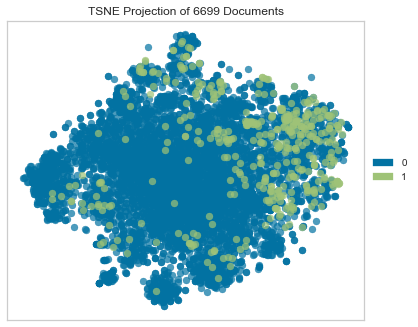

In [37]:
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
X=df.sents
y=df.label
tfidf  = TfidfVectorizer()
docs   = tfidf.fit_transform(X)
labels = y
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

In [67]:
# 05- SGD Classifier
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from nltk.corpus import stopwords
import string
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', XGBClassifier())])


In [68]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [69]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

In [70]:
def train_predict(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    return y_pred

In [71]:
def cross_validation_accuracy(clf,X,y):
    scores = cross_val_score(clf, X, y, cv=3)
    print(scores)
    print('Accuracy of : {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

In [72]:
def Color_Confusion_Matrix(y, y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    l=len(set(y))
    df_cm = pd.DataFrame(cm, range(l), range(l))
    sns.set(font_scale=1)
    sns.heatmap(df_cm,cmap="Blues", annot=True,annot_kws={"size": 16})
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    plt.title("Confusion Matrix", size = 16)
    plt.savefig('CM_Test_01.png')

In [73]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
def plot_roc_curve(fpr, tpr,auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve with AUC {:.3f}'.format(AUC))
    plt.legend()
    plt.show()

In [74]:
y_pred=train_predict(trial_02,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1555
           1       0.80      0.20      0.32       120

   micro avg       0.94      0.94      0.94      1675
   macro avg       0.87      0.60      0.64      1675
weighted avg       0.93      0.94      0.92      1675



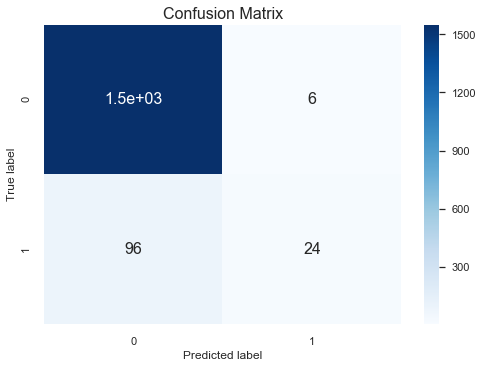

In [75]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

In [76]:
cross_validation_accuracy(trial_02,X,y)

[0.9377519  0.93864756 0.93819973]
Accuracy of : 0.938 ± 0.001


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6264
           1       0.64      0.18      0.28       435

   micro avg       0.94      0.94      0.94      6699
   macro avg       0.79      0.59      0.63      6699
weighted avg       0.93      0.94      0.92      6699



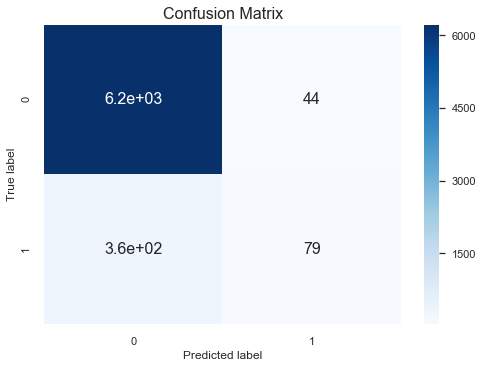

In [77]:
y_pred = cross_val_predict(trial_02, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [29]:
def depen_interact(x):
    c=displacy.render(nlp(df.sents[x]),style="dep",jupyter="True")
    return c


In [30]:
interact(depen_interact, x=(0,len(df),1));

interactive(children=(IntSlider(value=3349, description='x', max=6699), Output()), _dom_classes=('widget-inter…

df.to_pickle("dfSentsOB.pkl")

# Idea of using SDP

In [142]:
import spacy
import networkx as nx

doc = nlp(u'where the equation caused by the eccentricity is maximum. ')
print('sentence:'.format(doc))
# Load spacy's dependency tree into a networkx graph
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
graph = nx.Graph(edges)
# Get the length and path
entity1 = 'equation'.lower()
entity2 = 'eccentricity'
print(nx.shortest_path_length(graph, source=entity1, target=entity2))
print(nx.shortest_path(graph, source=entity1, target=entity2))

sentence:
2
['equation', 'the', 'eccentricity']


In [143]:
displacy.render(doc,style="dep",jupyter="True" )

In [144]:
edges

[('equation', 'the'),
 ('equation', 'caused'),
 ('caused', 'by'),
 ('by', 'eccentricity'),
 ('eccentricity', 'the'),
 ('is', 'where'),
 ('is', 'equation'),
 ('is', 'maximum'),
 ('is', '.')]

In [145]:
graph.is_directed()

False

In [146]:
graph.number_of_nodes()

9

In [147]:
graph.number_of_edges()

9

In [148]:
graph.degree

DegreeView({'equation': 3, 'the': 2, 'caused': 2, 'by': 2, 'eccentricity': 2, 'is': 4, 'where': 1, 'maximum': 1, '.': 1})

In [149]:
for token in doc:
    print((token.head.text, token.text, token.dep_))

('is', 'where', 'advmod')
('equation', 'the', 'det')
('is', 'equation', 'nsubj')
('equation', 'caused', 'acl')
('caused', 'by', 'agent')
('eccentricity', 'the', 'det')
('by', 'eccentricity', 'pobj')
('is', 'is', 'ROOT')
('is', 'maximum', 'acomp')
('is', '.', 'punct')


# Example 2

In [150]:
doc = nlp(u'A biopsy of this mass was consistent with hematoma ')
print('sentence:'.format(doc))
# Load spacy's dependency tree into a networkx graph
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
graph = nx.Graph(edges)
# Get the length and path
entity1 = 'biopsy'.lower()
entity2 = 'hematoma'
print(nx.shortest_path_length(graph, source=entity1, target=entity2))
print(nx.shortest_path(graph, source=entity1, target=entity2))

sentence:
4
['biopsy', 'was', 'consistent', 'with', 'hematoma']


In [151]:
displacy.render(doc,style="dep",jupyter="True" )